In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
house = pd.read_csv("data/housing/housing.csv")

In [9]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
house.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


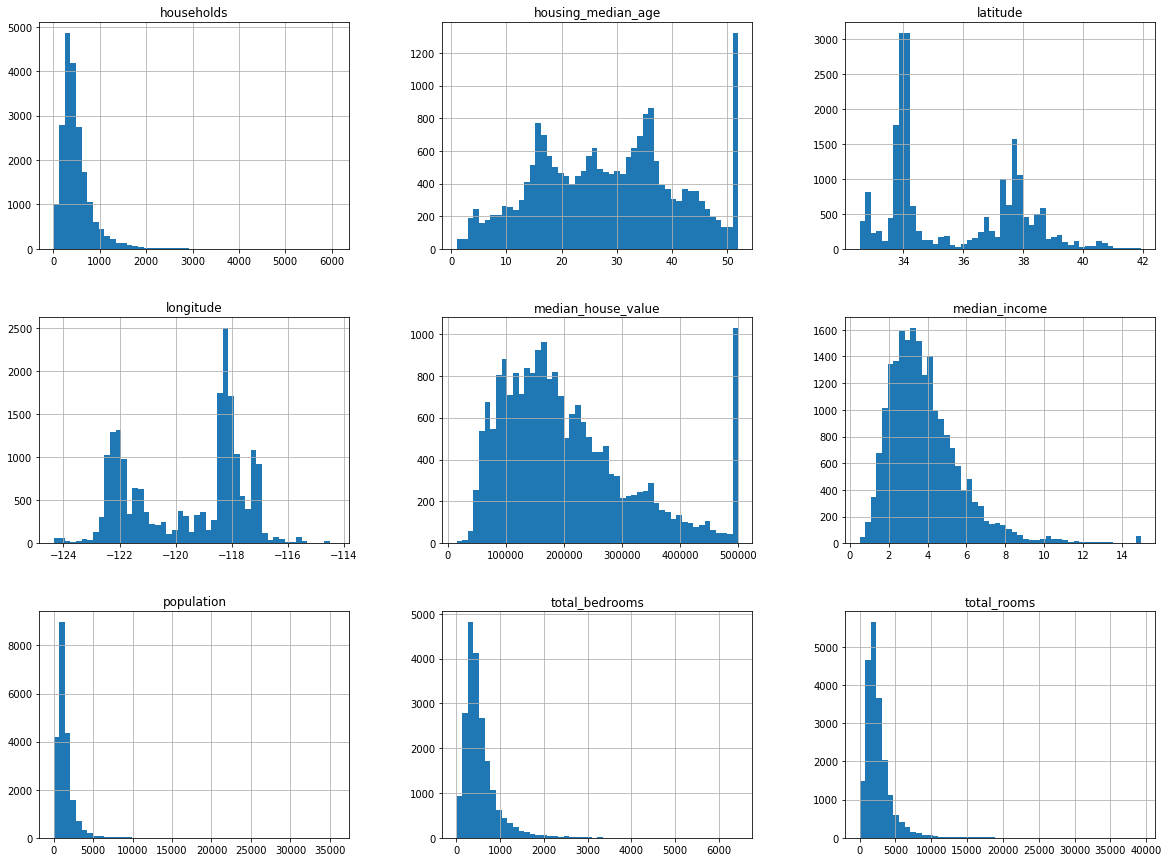

In [18]:
house.hist(bins=50, figsize=(20, 15))
plt.show()

In [47]:
# 创建测试集
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[test_indices], data.iloc[train_indices]

In [65]:
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set=ids.apply(lambda _id: test_set_check(_id, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [66]:
house_with_idx = house.reset_index()

In [74]:
test_set, train_set = split_train_test_by_id(house_with_idx, 0.2, "index")
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
20,20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20619,20619,-121.56,39.01,22.0,1891.0,340.0,1023.0,296.0,2.7303,99100.0,INLAND
20625,20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND
20632,20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND


In [94]:
house["income_cut"] = np.ceil(house["median_income"]/1.5)
house["income_cut"].where(house.income_cut<5, 5.0, inplace=True)

In [97]:
from sklearn.model_selection import StratifiedShuffleSplit

In [98]:
# 分层抽样
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=41)

In [117]:
for train_index, test_index in split.split(house, house.income_cut):
    strat_train_set = house.loc[train_index]
    strat_test_set = house.loc[test_index]

In [118]:
strat_test_set.income_cut.value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cut, dtype: float64

In [119]:
strat_train_set.income_cut.value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cut, dtype: float64

In [120]:
strat_test_set.drop("income_cut", axis=1, inplace=True)
strat_train_set.drop("income_cut", axis=1, inplace=True)

In [123]:
strat_train_set.to_csv("./temp_data/housing.csv", index=False)

In [2]:
housing = pd.read_csv("./temp_data/housing.csv")

In [3]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.03,33.82,20.0,2662.0,464.0,1275.0,472.0,6.0162,318500.0,<1H OCEAN
1,-117.85,33.62,13.0,5192.0,658.0,1865.0,662.0,15.0001,500001.0,<1H OCEAN
2,-121.51,38.57,36.0,613.0,166.0,425.0,147.0,2.2031,93800.0,INLAND
3,-123.63,41.11,19.0,1797.0,384.0,1033.0,327.0,1.4911,59200.0,<1H OCEAN
4,-117.60,33.87,18.0,6450.0,1165.0,3716.0,1113.0,4.2721,150300.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,-117.91,33.76,22.0,7531.0,1569.0,5254.0,1523.0,3.8506,167400.0,<1H OCEAN
16508,-121.97,37.31,25.0,5775.0,1225.0,3580.0,1138.0,3.9187,314900.0,<1H OCEAN
16509,-122.52,37.90,16.0,1704.0,402.0,689.0,348.0,4.4239,267100.0,NEAR BAY
16510,-121.86,37.38,15.0,2052.0,405.0,1380.0,409.0,5.8686,181100.0,<1H OCEAN


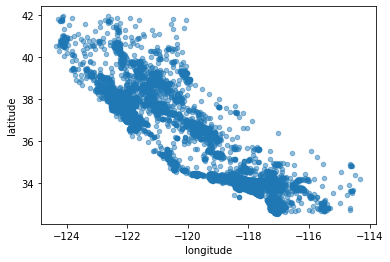

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.49)
plt.show()

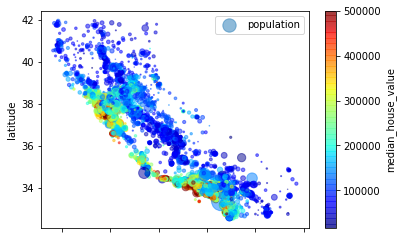

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
            s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.show()

In [24]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924208,-0.109516,0.049306,0.074237,0.105816,0.059781,-0.019568,-0.049897
latitude,-0.924208,1.000000,0.011499,-0.038834,-0.068830,-0.112147,-0.072910,-0.076904,-0.141620
housing_median_age,-0.109516,0.011499,1.000000,-0.363013,-0.323297,-0.300212,-0.305806,-0.114760,0.111686
total_rooms,0.049306,-0.038834,-0.363013,1.000000,0.931339,0.857320,0.918272,0.196804,0.131987
total_bedrooms,0.074237,-0.068830,-0.323297,0.931339,1.000000,0.877830,0.978793,-0.007924,0.046671
population,0.105816,-0.112147,-0.300212,0.857320,0.877830,1.000000,0.908247,0.004892,-0.024677
households,0.059781,-0.072910,-0.305806,0.918272,0.978793,0.908247,1.000000,0.012923,0.063285
median_income,-0.019568,-0.076904,-0.114760,0.196804,-0.007924,0.004892,0.012923,1.000000,0.687668
median_house_value,-0.049897,-0.141620,0.111686,0.131987,0.046671,-0.024677,0.063285,0.687668,1.000000


In [26]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ca02898>,
      dtype=object)

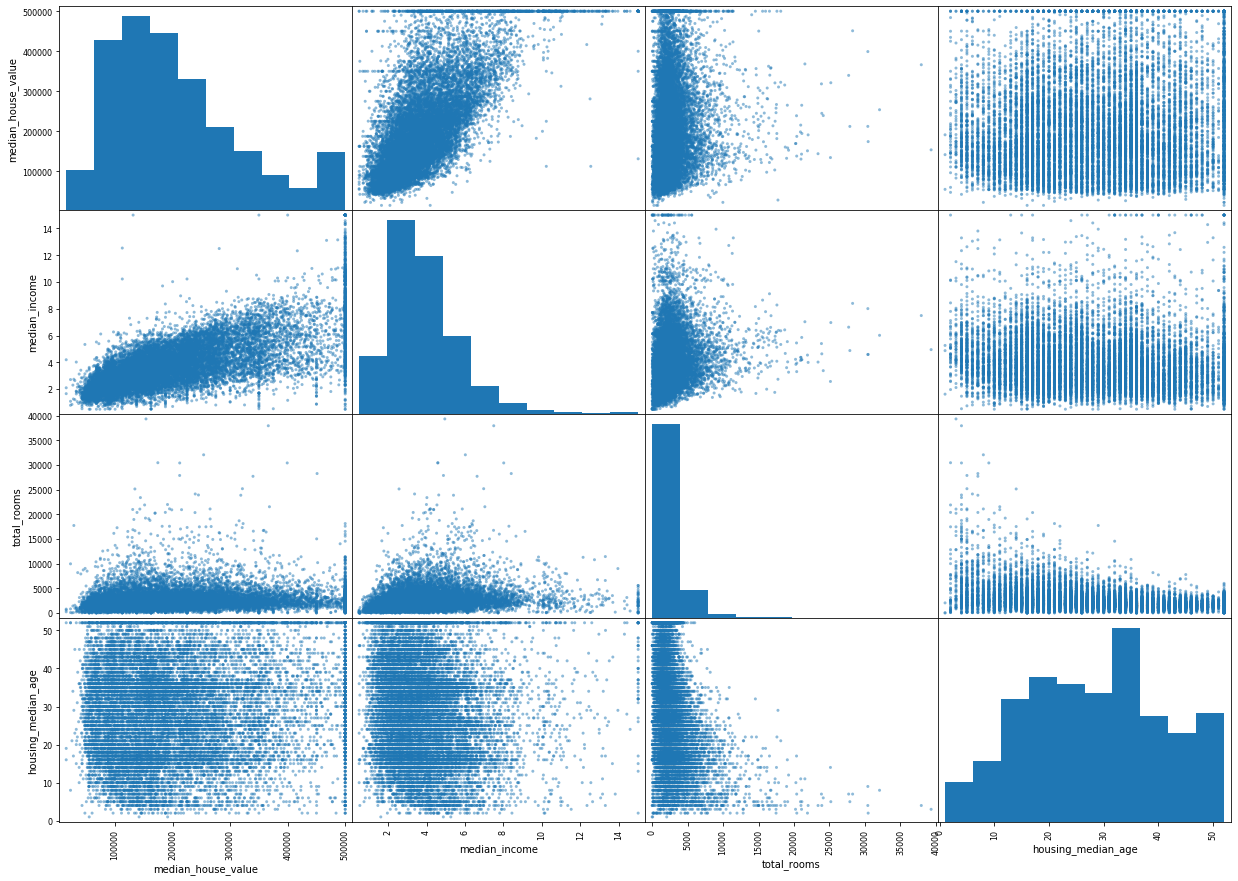

In [31]:
scatter_matrix(housing[["median_house_value", "median_income", "total_rooms", "housing_median_age"]], figsize=[21, 15])

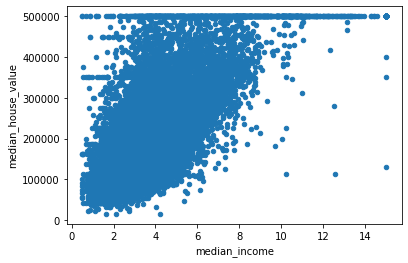

In [33]:
housing.plot(kind="scatter", y="median_house_value", x="median_income")
plt.show()

In [40]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [41]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-118.03,33.82,20.0,2662.0,464.0,1275.0,472.0,6.0162,318500.0,<1H OCEAN,5.639831,0.174305,2.701271
1,-117.85,33.62,13.0,5192.0,658.0,1865.0,662.0,15.0001,500001.0,<1H OCEAN,7.842900,0.126733,2.817221
2,-121.51,38.57,36.0,613.0,166.0,425.0,147.0,2.2031,93800.0,INLAND,4.170068,0.270799,2.891156
3,-123.63,41.11,19.0,1797.0,384.0,1033.0,327.0,1.4911,59200.0,<1H OCEAN,5.495413,0.213689,3.159021
4,-117.60,33.87,18.0,6450.0,1165.0,3716.0,1113.0,4.2721,150300.0,INLAND,5.795148,0.180620,3.338724
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.91,33.76,22.0,7531.0,1569.0,5254.0,1523.0,3.8506,167400.0,<1H OCEAN,4.944846,0.208339,3.449770
16508,-121.97,37.31,25.0,5775.0,1225.0,3580.0,1138.0,3.9187,314900.0,<1H OCEAN,5.074692,0.212121,3.145870
16509,-122.52,37.90,16.0,1704.0,402.0,689.0,348.0,4.4239,267100.0,NEAR BAY,4.896552,0.235915,1.979885
16510,-121.86,37.38,15.0,2052.0,405.0,1380.0,409.0,5.8686,181100.0,<1H OCEAN,5.017115,0.197368,3.374083


In [46]:
housing.corr()[["median_house_value"]].sort_values("median_house_value", ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687668
rooms_per_household,0.155908
total_rooms,0.131987
housing_median_age,0.111686
households,0.063285
total_bedrooms,0.046671
population,-0.024677
population_per_household,-0.032129
longitude,-0.049897


In [47]:
from sklearn.preprocessing import Imputer

In [48]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [50]:
imputer = Imputer(strategy="median")

In [51]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [55]:
X = imputer.transform(housing_num)

In [58]:
housting_tr = pd.DataFrame(X, columns=housing_num.columns)

In [59]:
housting_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-118.03,33.82,20.0,2662.0,464.0,1275.0,472.0,6.0162,318500.0,5.639831,0.174305,2.701271
1,-117.85,33.62,13.0,5192.0,658.0,1865.0,662.0,15.0001,500001.0,7.842900,0.126733,2.817221
2,-121.51,38.57,36.0,613.0,166.0,425.0,147.0,2.2031,93800.0,4.170068,0.270799,2.891156
3,-123.63,41.11,19.0,1797.0,384.0,1033.0,327.0,1.4911,59200.0,5.495413,0.213689,3.159021
4,-117.60,33.87,18.0,6450.0,1165.0,3716.0,1113.0,4.2721,150300.0,5.795148,0.180620,3.338724
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.91,33.76,22.0,7531.0,1569.0,5254.0,1523.0,3.8506,167400.0,4.944846,0.208339,3.449770
16508,-121.97,37.31,25.0,5775.0,1225.0,3580.0,1138.0,3.9187,314900.0,5.074692,0.212121,3.145870
16509,-122.52,37.90,16.0,1704.0,402.0,689.0,348.0,4.4239,267100.0,4.896552,0.235915,1.979885
16510,-121.86,37.38,15.0,2052.0,405.0,1380.0,409.0,5.8686,181100.0,5.017115,0.197368,3.374083


In [78]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

In [62]:
encoder = LabelEncoder()

In [64]:
housing_cat = housing[["ocean_proximity"]]
housing_cat_encoded = encoder.fit_transform(housing_cat)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
housing_cat_encoded

array([0, 0, 1, ..., 3, 0, 0])

In [66]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [74]:
encoder=OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [76]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [82]:
encoder=LabelBinarizer()
housing_bin = encoder.fit_transform(housing_cat)
housing_bin

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [84]:
from sklearn.base import BaseEstimator, TransformerMixin

In [90]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self;
    def transform():
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]